# Ford GoBike System Data Exploration
## by Vrushabh Suchak

## Introduction

> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

> Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

> The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

> You can find the dataset used [here](https://s3.amazonaws.com/baywheels-data/index.html).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Preliminary Wrangling

### Gather

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

### Assess

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [5]:
df.shape

(519700, 13)

In [6]:
# Additional Statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [7]:
# Let's look for duplicates
df.duplicated().sum() 

0

In [8]:
# Let's look for NaN values
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [9]:
# Need to convert this to Category datatype
df.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

### Clean

In [10]:
# Making a copy of a DataFrame
df_clean = df.copy()

**Define:** Convert `start_time` and `end_time` columns to datetime format

**Code**

In [11]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

**Test**

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: datetime64[ns](2), float64(4), int64(4), object(3)
memory usage: 51.5+ MB


**Define:** Convert `start_station_id`, `end_station_id`, `bike_id` columns to object format

**Code**

In [13]:
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)
df_clean.bike_id = df_clean.bike_id.astype(str)

**Test**

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null object
dtypes: datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 51.5+ MB


**Define:** Change the `user_type` columns to category format

**Code**

In [15]:
df_clean.user_type = df_clean.user_type.astype('category')

**Test**

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null category
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 48.1+ MB


**Define:** Extract Month, Weekday, and Hour from `start_time` column and make new columns for `start_time_month`, `start_time_weekday`, and `start_time_hour`

**Code**

In [17]:
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')
df_clean['start_time_weekday'] = df_clean['start_time'].dt.strftime('%a')
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour

**Test**

In [18]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_month,start_time_weekday,start_time_hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,December,Sun,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,December,Sun,15
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,December,Sun,22
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,December,Sun,17
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,December,Sun,14


**Define:** Convert `start_time_month`, `start_time_weekday`, and `start_time_hour` columns to categorical datatype

**Code**

In [19]:
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories=weekdays)
df_clean['start_time_weekday'] = df_clean['start_time_weekday'].astype(ordered_weekdays)

In [20]:
df_clean.start_time_month.value_counts()

October      108937
September     98558
November      95612
December      86539
August        83292
July          44073
June           2689
Name: start_time_month, dtype: int64

In [21]:
months = ['June', 'July', 'August', 'September', 'October', 'November', 'December']
ordered_months = pd.api.types.CategoricalDtype(ordered = True, categories=months)
df_clean['start_time_month'] = df_clean['start_time_month'].astype(ordered_months)

**Test**

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 16 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null category
start_time_month           519700 non-null category
start_time_weekday         519700 non-null category
start_time_hour            519700 non-null int64
dtypes: category(3), datetime64[ns](2), float64(4), int64(2), obj

**Define:** Sort all the DataFrame rows with respect to `start_time` column

**Code**

In [23]:
df_clean = df_clean.sort_values(by='start_time', ascending=True)

**Test**

In [24]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_month,start_time_weekday,start_time_hour
519697,424,2017-06-28 09:47:36.347,2017-06-28 09:54:41.187,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,June,Wed,9
519698,366,2017-06-28 09:47:41.664,2017-06-28 09:53:47.715,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,June,Wed,9
519699,188,2017-06-28 09:49:46.377,2017-06-28 09:52:55.338,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber,June,Wed,9
519692,1201,2017-06-28 09:50:59.175,2017-06-28 10:11:00.359,81,Berry St at 4th St,37.775880,-122.393170,9,Broadway at Battery St,37.798572,-122.400869,77,Subscriber,June,Wed,9
519696,431,2017-06-28 09:56:39.631,2017-06-28 10:03:51.090,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber,June,Wed,9


In [25]:
df_clean.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_month,start_time_weekday,start_time_hour
15,1544,2017-12-31 23:53:38.943,2018-01-01 00:19:23.047,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,558,Subscriber,December,Sun,23
22,422,2017-12-31 23:54:25.337,2018-01-01 00:01:27.354,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,99,Folsom St at 15th St,37.767037,-122.415443,2415,Subscriber,December,Sun,23
16,1474,2017-12-31 23:54:40.146,2018-01-01 00:19:14.351,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,3646,Subscriber,December,Sun,23
17,1397,2017-12-31 23:55:09.686,2018-01-01 00:18:26.721,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1667,Customer,December,Sun,23
20,386,2017-12-31 23:59:01.261,2018-01-01 00:05:27.809,317,San Salvador St at 9th St,37.333955,-121.877349,296,5th St at Virginia St,37.325998,-121.877120,1603,Subscriber,December,Sun,23


**Define:** Let's convert `duration_sec` column into `duration_min` column

**Code**

In [26]:
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

**Test**

In [27]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_month,start_time_weekday,start_time_hour,duration_min
519697,424,2017-06-28 09:47:36.347,2017-06-28 09:54:41.187,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,June,Wed,9,7
519698,366,2017-06-28 09:47:41.664,2017-06-28 09:53:47.715,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,June,Wed,9,6
519699,188,2017-06-28 09:49:46.377,2017-06-28 09:52:55.338,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber,June,Wed,9,3
519692,1201,2017-06-28 09:50:59.175,2017-06-28 10:11:00.359,81,Berry St at 4th St,37.775880,-122.393170,9,Broadway at Battery St,37.798572,-122.400869,77,Subscriber,June,Wed,9,20
519696,431,2017-06-28 09:56:39.631,2017-06-28 10:03:51.090,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber,June,Wed,9,7


**We have got information about latitude and Longitude of start station and end station. We can find the distance travelled by each bike ride. Let's find it.** 

**Define:** Find the distance travelled by each bike ride based on information given on latitude and longtitude. 

**Code**

In [28]:
from math import sin, cos, sqrt, atan2, radians

def distance(lat1, lon1, lat2, lon2):
    R = 6373.0   
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return np.float64(round(1000*distance))

In [29]:
df_clean['distance'] = df_clean.apply(lambda row: distance(row['start_station_latitude'], row['start_station_longitude'],
                                                           row['end_station_latitude'], row['end_station_longitude']), axis=1)

**Test**

In [30]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_month,start_time_weekday,start_time_hour,duration_min,distance
519697,424,2017-06-28 09:47:36.347,2017-06-28 09:54:41.187,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,June,Wed,9,7,1073.0
519698,366,2017-06-28 09:47:41.664,2017-06-28 09:53:47.715,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,June,Wed,9,6,244.0
519699,188,2017-06-28 09:49:46.377,2017-06-28 09:52:55.338,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber,June,Wed,9,3,703.0
519692,1201,2017-06-28 09:50:59.175,2017-06-28 10:11:00.359,81,Berry St at 4th St,37.775880,-122.393170,9,Broadway at Battery St,37.798572,-122.400869,77,Subscriber,June,Wed,9,20,2613.0
519696,431,2017-06-28 09:56:39.631,2017-06-28 10:03:51.090,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber,June,Wed,9,7,921.0


**The above DataFrame is clean and tidy dataset and it contains everything required to perform Data Eploration and Data Visualization. Let's export it to csv.**

In [31]:
df_clean.to_csv('2017-fordgobike-tripdata_modified.csv', index=False)

### What is the structure of your dataset?

> The Ford GoBike System Data is straightforward and intuitive to understand. This data has been collected efficiently, providing a valuable collection of data to work with and draw conclusions from. 

>This notebook uses data collected from June 28th, 2017 through December 31st, 2017. There were approximately 519,700 bike rides in the San Francisco Bay area of California, USA. 

> The column header descriptions are as follows:
- Trip Duration (seconds)
    - Start Time and Date
    - End Time and Date
- Start Station ID
    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude
- End Station ID
    - End Station Name
    - End Station Latitude
    - End Station Longitude
- Bike ID
- User Type (Subscriber or Customer)
- Distance travelled (in meters)
    
> I added the following columns in my cleaning efforts:	
- Start Time Month		
- Start Time Weekday	
- Start Time Hour
- Duration in Minutes
- Distance Travelled (in meters)

### What is/are the main feature(s) of interest in your dataset?

> Following are the columns of my interest: 
- Trip Duration
- User Type 
- Start Time Month
- Start Time Weekday
- Start Time Hour 
- Distance Travelled 
> 
We can uncover plenty of hidden insights and patterns in our data using the above columns. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> Trip Duration in minutes and Start Time Hour will be helpful to support my investigation. We can use these to find out when the bikes are in low or high demand. Such information are imperative to drive business decisions. The information about the distance travelled will also be useful in the investigation.

## Univariate Exploration

### What proportion of users are subscribers and customers?

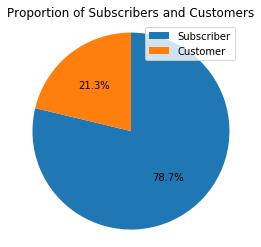

In [32]:
sorted_counts = df_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels=None, startangle=90, counterclock=False, autopct='%.1f%%');
plt.axis('square');
plt.title('Proportion of Subscribers and Customers');
plt.legend(sorted_counts.index);

> **Among the users of Ford GoBike, there are 78.7% subscribers compared to only 21.3% customers.**

### What is the day wise usage of the Ford GoBike system?

In [33]:
base_color = sb.color_palette()[0]
base_color1 = sb.color_palette()[1]

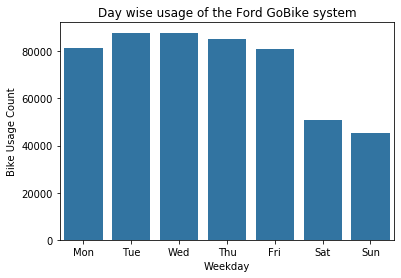

In [34]:
sb.countplot(data=df_clean, x='start_time_weekday', color=base_color);
plt.xlabel('Weekday');
plt.ylabel('Bike Usage Count');
plt.title('Day wise usage of the Ford GoBike system');

> **The usage drops significantly on Saturdays and Sundays suggesting that the Ford GoBike system is primarily used for communting purpose on working days.**

### What is the month wise usage of the Ford GoBike system?

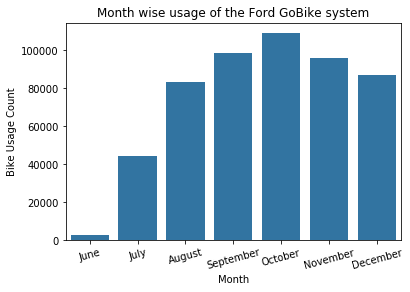

In [35]:
sb.countplot(data=df_clean, x='start_time_month', color=base_color);
plt.xlabel('Month');
plt.ylabel('Bike Usage Count');
plt.title('Month wise usage of the Ford GoBike system');
plt.xticks(rotation=15);

Something looks wrong about June month. I guess we have less data for the month of June. Let's check.

In [36]:
df_clean['start_time_month'].value_counts()

October      108937
September     98558
November      95612
December      86539
August        83292
July          44073
June           2689
Name: start_time_month, dtype: int64

There are very less rows for the month of June. Since we have sorted the rows according to the `start_time` column, let's look at the first date.

In [37]:
df_clean['start_time'].head(1)

519697   2017-06-28 09:47:36.347
Name: start_time, dtype: datetime64[ns]

We have data from 28th June, 2017. 

### What is the usage by hour of the Ford GoBike system?

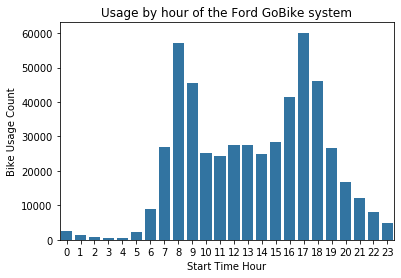

In [38]:
sb.countplot(data=df_clean, x='start_time_hour', color=base_color);
plt.xlabel('Start Time Hour');
plt.ylabel('Bike Usage Count');
plt.title('Usage by hour of the Ford GoBike system');

> **8:00 AM and 5:00 PM are the two peak hours which have most bikers.**

### From which station do the most bikers start their trip? 

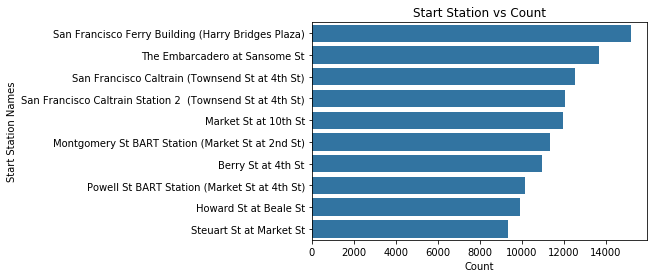

In [39]:
start_station_name = df_clean['start_station_name'].value_counts().head(10).index
sb.countplot(data = df_clean, y = 'start_station_name', color = base_color, order = start_station_name)
plt.title('Start Station vs Count');
plt.xlabel('Count');
plt.ylabel('Start Station Names');

> **Most people start their trips from `San Francisco Ferry Building` station.**

### To which station do the most bikers end their trip?

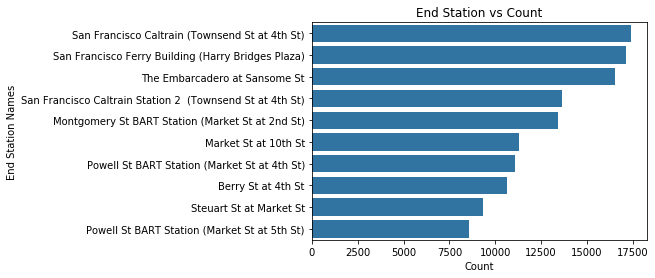

In [40]:
end_station_name = df_clean['end_station_name'].value_counts().head(10).index
sb.countplot(data = df_clean, y = 'end_station_name', color = base_color, order = end_station_name)
plt.title('End Station vs Count');
plt.xlabel('Count');
plt.ylabel('End Station Names');

> **`San Francisco Caltrain` station is used most by bikers to end their trips.**

### What is the distribution of duration (in minute) of bike rides?

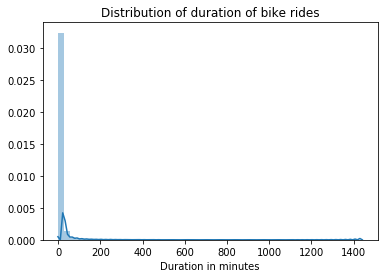

In [41]:
sb.distplot(df_clean['duration_min'], color=base_color);
plt.title('Distribution of duration of bike rides');
plt.xlabel('Duration in minutes');

> The plot is not evenly distributed. Hence, we will have to change the scale for better visualization.

In [42]:
df_clean['duration_min'].describe()

count    519700.000000
mean         17.825757
std          57.403474
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max        1439.000000
Name: duration_min, dtype: float64

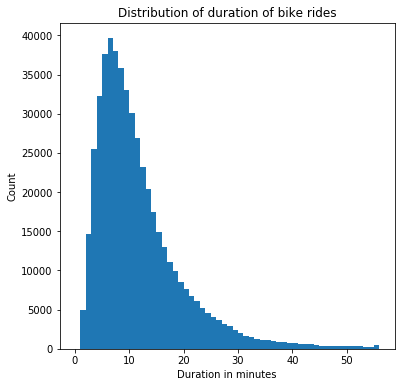

In [43]:
binsize = 1
bins = np.arange(0, 57, binsize) # Standard Deviation is 57
plt.figure(figsize=[6, 6])
plt.hist(data = df_clean, x='duration_min', bins=bins)
plt.title('Distribution of duration of bike rides')
plt.xlabel('Duration in minutes')
plt.ylabel('Count')
plt.show()

> **We observe that most of the trips have a duration of around 8 minutes.**

### What is the distribution of distance travelled by bike rides?

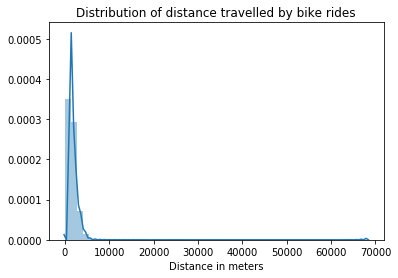

In [44]:
sb.distplot(df_clean['distance'], color=base_color);
plt.title('Distribution of distance travelled by bike rides');
plt.xlabel('Distance in meters');

> The plot is not evenly distributed. Hence, we will have to change the scale for better visualization.

In [45]:
df_clean['distance'].describe()

count    519700.000000
mean       1587.575950
std        1010.709491
min           0.000000
25%         900.000000
50%        1401.000000
75%        2073.000000
max       68208.000000
Name: distance, dtype: float64

In [46]:
df_clean['distance'].describe()['std']

1010.7094906882227

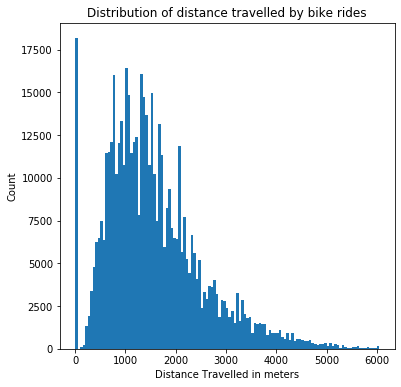

In [47]:
binsize = 50
bins = np.arange(0, df_clean['distance'].describe()['std']*6, binsize) # Standard Deviation is 1010
plt.figure(figsize=[6, 6])
plt.hist(data = df_clean, x='distance', bins=bins)
plt.title('Distribution of distance travelled by bike rides')
plt.xlabel('Distance Travelled in meters')
plt.ylabel('Count')
plt.show()

> We can see from the above distribution that there's unusually high data points in the first bin. Let's explore more of this. 

In [48]:
df_clean[df_clean['distance'] == 0.0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_month,start_time_weekday,start_time_hour,duration_min,distance
519671,73,2017-06-28 10:44:17.050,2017-06-28 10:45:30.337,50,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,50,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,278,Subscriber,June,Wed,10,1,0.0
519631,3819,2017-06-28 10:44:43.717,2017-06-28 11:48:23.636,48,2nd St at S Park St,37.782411,-122.392706,48,2nd St at S Park St,37.782411,-122.392706,331,Customer,June,Wed,10,63,0.0
519670,123,2017-06-28 10:45:45.282,2017-06-28 10:47:49.158,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,920,Subscriber,June,Wed,10,2,0.0
519664,72,2017-06-28 10:52:55.763,2017-06-28 10:54:08.290,42,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,42,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,25,Subscriber,June,Wed,10,1,0.0
519658,214,2017-06-28 10:56:53.364,2017-06-28 11:00:27.965,42,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,42,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,799,Subscriber,June,Wed,10,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,575,2017-12-31 23:17:57.867,2017-12-31 23:27:32.880,6,The Embarcadero at Sansome St,37.804770,-122.403234,6,The Embarcadero at Sansome St,37.804770,-122.403234,1568,Customer,December,Sun,23,9,0.0
9,4238,2017-12-31 23:35:38.145,2018-01-01 00:46:17.053,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,December,Sun,23,70,0.0
8,4150,2017-12-31 23:37:07.548,2018-01-01 00:46:18.308,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,December,Sun,23,69,0.0
7,4334,2017-12-31 23:46:37.196,2018-01-01 00:58:51.211,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,December,Sun,23,72,0.0


> **As we can see that there are 18134 rows where the distance travelled is 0. This has to do with the fact that start station and end station are same. So basically, the distance column doesn't give us the distance travelled. Rather it gives us the displacement.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Due to thorough cleaning efforts, there were no unusual points during he exploratory and visualization phase. Although there was some anomaly in the `Month wise usage of the Ford GoBike system` chart, it was found that we had less data for the month of June. <br><br>
> There were unusually many data points whose start station and end station were same.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Nothing seems to be unusual with respect to distributions for the features I have investigated. The data was already tidy. <br><br>
> Edit: The distribution of Distance travelled was unusual. On investigation, it was found out that there were many data points whose start station and end station were same.

## Bivariate Exploration

### What is the monthly bike ride count per user type?

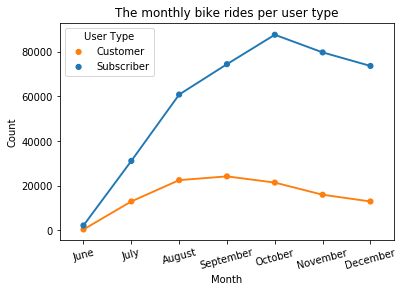

In [49]:
user_type_count = df_clean.groupby(["start_time_month", "user_type"]).size().reset_index()
#plt.figure(figsize=(6,7))
palette = {'Subscriber':base_color, 'Customer':base_color1}
axis = sb.pointplot(x='start_time_month', y=0, hue='user_type', palette=palette, scale=.7, data=user_type_count)
plt.title('The monthly bike rides per user type')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=15);
leg = axis.legend()
leg.set_title('User Type')

> **Subscriber rides seems to be increasing but there is decrease in usage after the month of October. I think it is because of the cold weather.**

### What is the day wise usage by user type?

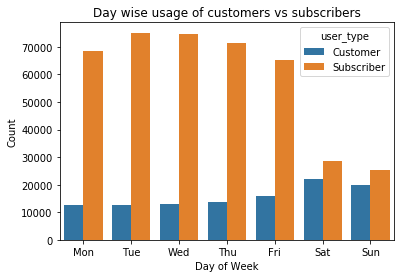

In [50]:
sb.countplot(data=df_clean, x='start_time_weekday', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('Day wise usage of customers vs subscribers');

> **From the above plot we can infer that on weekends customer usage increases.**

### What is the relationship between User type and Start Hour?

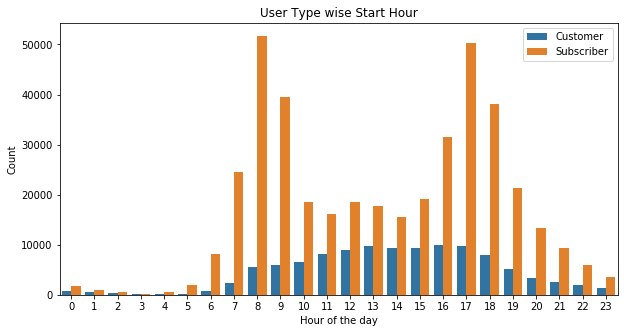

In [51]:
plt.figure(figsize = [10, 5])
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'user_type')
plt.legend();
plt.title('User Type wise Start Hour');
plt.xlabel('Hour of the day');
plt.ylabel('Count');

> **Subscribers start their trip mostly during 8-9 am and 4-6 pm which is usually the working hours.**

### What is the relationship between Duration of bike rides and User type?

> Let's plot a Violin Plot as well as Box Plot to investigate this relataionship

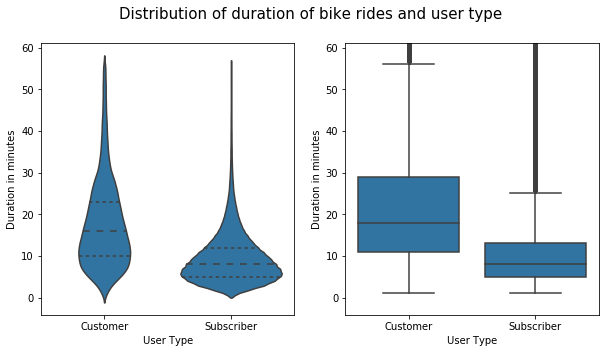

In [52]:
plt.figure(figsize = [10, 5])

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_clean.query("duration_min < 57"), x = 'user_type', y = 'duration_min',
                    inner = 'quartile', color = base_color)
plt.xlabel('User Type');
plt.ylabel('Duration in minutes');
# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df_clean, x = 'user_type', y = 'duration_min', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xlabel('User Type');
plt.ylabel('Duration in minutes');
plt.suptitle('Distribution of duration of bike rides and user type', fontsize=15);

> **From the above plots, we can see that the median time travelled by the subscribers is less than that of customers.**

### How does the distribution of travel time (duration) looks like for each user type?

In [53]:
# Standard Deviation
df_clean.query('distance')['distance'].describe()['std']

1031.9618344987837

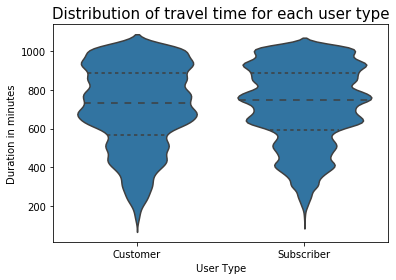

In [54]:
sb.violinplot(data = df_clean.query("distance < 1031 and distance > 30"),
              x = 'user_type', y = 'distance', inner = 'quartile', color = base_color)
plt.xlabel('User Type');
plt.ylabel('Duration in minutes');
plt.title('Distribution of travel time for each user type', fontsize=15);

> **The distribution follows the same pattern for time travelled for each user type. The median time travelled by each user turn is almost same.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user type to the analysis revealed different behavior usage between customers and subscribers. The data suggests that the customers are casual riders such as tourists or students on a vacation or holiday. This is evident from the above investigation that customer usage increases on the weekends. In contrast, the investigation suggests that subscribers are daily commuters or full time students who use the Ford GoBike system during weekdays and mostly for shorter distances. They mostly rent bike before or after a typical work or school day. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides during weekends, which may be for longer trips around the surrounding area. Subscribers use the system mainly for commute purposes so they prefer quick, short rides to and from work.

## Multivariate Exploration

### What is the hourly usage during weekdays for customers and subscribers?

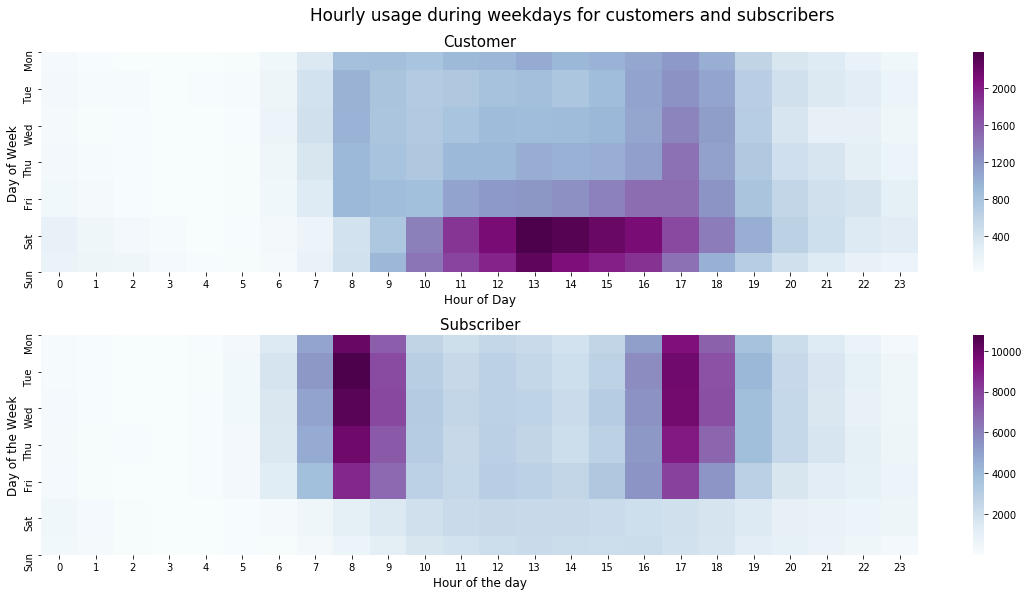

In [55]:
plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1);
customers = df_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_time_weekday', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_time_weekday', columns='start_time_hour', values='count')
sb.heatmap(ct_counts, cmap='BuPu');
plt.title('Customer', fontsize=15);
plt.xlabel('Hour of Day', fontsize=12);
plt.ylabel('Day of Week', fontsize=12);
plt.tight_layout();

plt.subplot(2, 1, 2)
subscribers = df_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_time_weekday', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_time_weekday', columns='start_time_hour', values='count')
sb.heatmap(st_counts, cmap='BuPu');
plt.title('Subscriber', fontsize=15);
plt.xlabel('Hour of the day', fontsize=12);
plt.ylabel('Day of the Week', fontsize=12);
plt.tight_layout();
plt.suptitle('Hourly usage during weekdays for customers and subscribers', y=1.03, fontsize=17);

> **The above plot clearly shows the difference in usage behavior between customers and subscribers. Subscribers usage is mostly during the rush hours of morning and evening. Subcriber Usage during the weekends decrease drastically suggesting that they use bike rides mostly for work purpose. In contrast, customers go on bike rides mostly on weekends suggesting that they use it for leisure purpose.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship between `Hour of the day`, `Day of the week`, and `User Type` was obsevered in the above plot. The short period of usage for subscribers corresponds to their high concentration on rush hours i.e. Monday through Friday, which is mostly for the work. The customer usage shows that they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over the weekends and in the afternoon, mainly for city tour or leisure purpose.

### Were there any interesting or surprising interactions between features?

> The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed.

## References

[StackOverFlow](https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude)<br>
[Pandas documentation](https://pandas.pydata.org/docs/user_guide/)<br>
[Numpy documentation](https://numpy.org/doc/stable/user/)<br>
[Matplotlib documentation](https://matplotlib.org/3.2.1/tutorials/index.html)<br>
[Seaborn documentation](https://seaborn.pydata.org/)<br>
[Github](https://github.com/chelseymarie6/Communicate-Data-Findings/blob/master/Communicate_Data_Slide_Deck.ipynb)